In [1]:
import pandas as pd

In [2]:
import nltk
# nltk.download()

In [3]:
df = pd.read_csv('/Users/jz/Downloads/pachong/merge/data_job.csv')

In [4]:
df[['date','Reviews']] = df[['date','Reviews']].fillna(0)
df['date'] = df['date'].astype(int)

In [5]:
df.head()

,date,job_title,company,Reviews,location,desc
0,0,Machine Lubrication Analyst,"Coeur Mining, Inc.",0,Alaska,NaN
1,0,FILE CLERK,Mobile County Public Schools,184,"Mobile County, AL",The duties include but are not limited to:\n\n...
2,0,Performance Improvement - Data Analyst,Yukon-Kuskokwim Health Corporation,0,"Bethel, AK 99559",NaN
3,0,Store Worker,US Department of Defense,"4,937","Redstone Arsenal, AL",NaN
4,0,Academic Tutor,AmeriCorps,"2,426",Alaska,NaN


In [6]:
df['desc'] = df['desc'].fillna(' ')

In [7]:
#df.to_csv('df.csv')

In [8]:
df_200 =  df[:200]

In [9]:
description = ""
for desc in df_200['desc']:
    description+= desc

In [10]:
description_list = []
for desc in df_200['desc']:
    description_list.append(desc)

In [11]:
from nltk.tokenize import word_tokenize
from collections import Counter

# Tokenize the article: tokens
tokens = word_tokenize(description)

# Convert the tokens into lowercase: lower_tokens
lower_tokens = [t.lower() for t in tokens]

# Create a Counter with the lowercase tokens: bow_simple
bow_simple = Counter(lower_tokens)

# Print the 10 most common tokens
bow_simple.most_common(10)


[(',', 4511),
 ('and', 4066),
 ('.', 3128),
 ('to', 2162),
 ('the', 1963),
 ('of', 1727),
 ('in', 1050),
 ('a', 978),
 ('with', 934),
 ('for', 746)]

In [32]:
# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Retain alphabetic words: alpha_only
alpha_only = [t for t in lower_tokens if t.isalpha()]

# Remove all stop words: no_stops
no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

# Lemmatize all tokens into a new list: lemmatized
lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

# Create the bag-of-words: bow
bow = Counter(lemmatized)


key = bow.most_common(200)

In [85]:
df_key_top = df_key[:100]
df_key_top[:10]

,key,count
0,data,639
1,experience,470
2,work,418
3,ability,311
4,skill,299
5,system,270
6,management,269
7,required,262
8,information,255
9,business,217


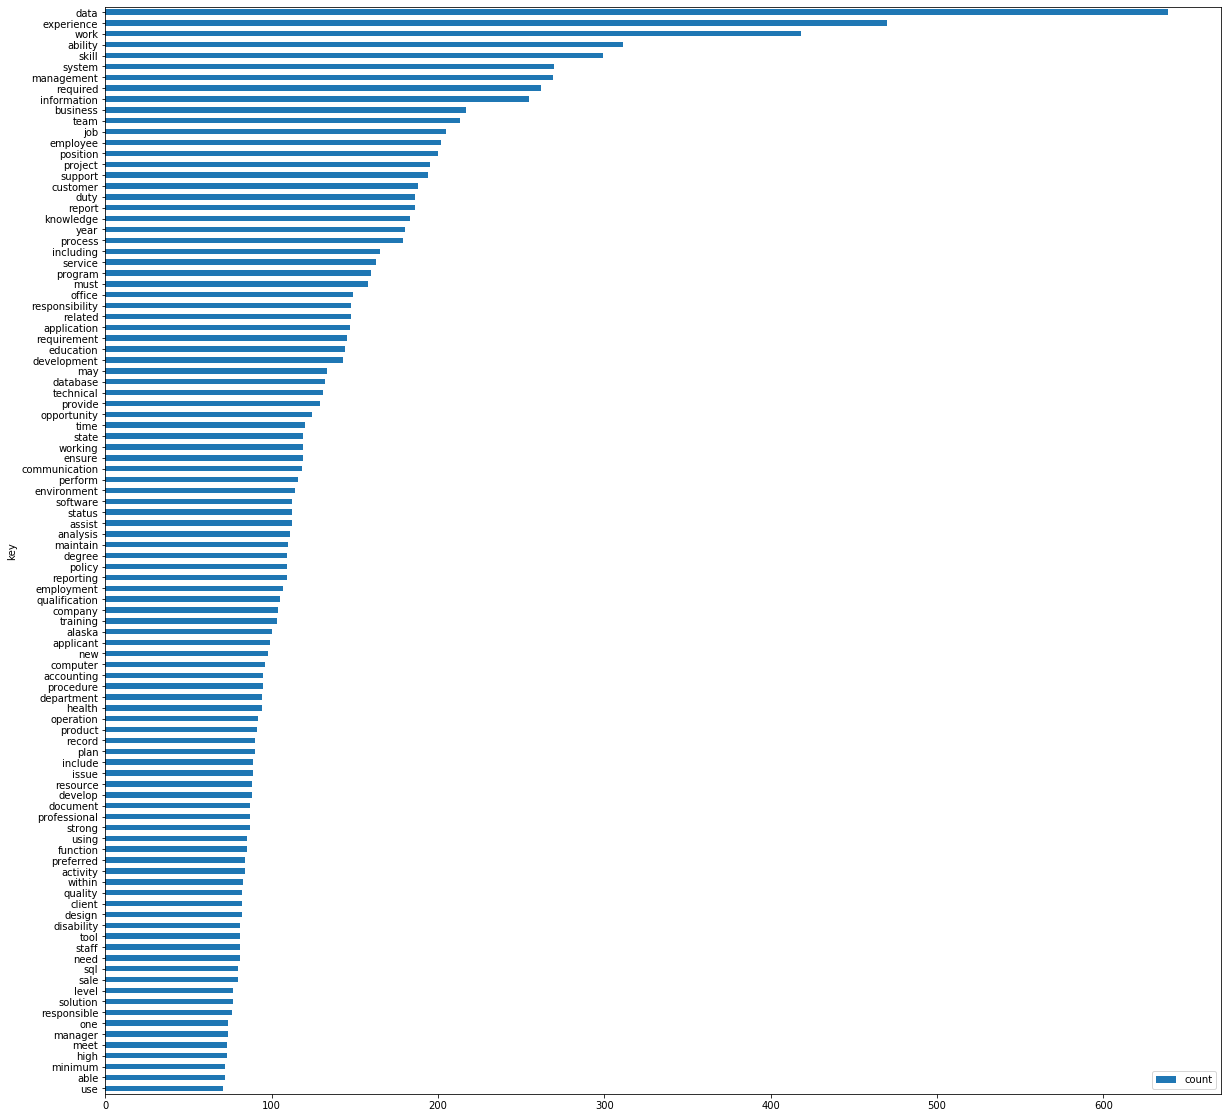

In [86]:
df_key_top.sort_index(axis=0, ascending=False).plot(kind='barh',x='key', y='count', rot=0,figsize=(20,20))